<a href="https://colab.research.google.com/github/OmarJames8/Classifying_movie_reviews_using_NLP/blob/main/Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

df= pd.read_csv('/content/drive/MyDrive/Tech I.S/techis-ds-wiki-main/DS/Step 3-1 NLP/01_NLP/FakeNews.csv')

df= df[:5000]

df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
print("Dimension of dataset:", df.shape)
print("Number of rows in the dataset:", df.shape[0])
print("Number of columns in the dataset:", df.shape[1])

Dimension of dataset: (5000, 5)
Number of rows in the dataset: 5000
Number of columns in the dataset: 5


In [8]:
print ( "Column Names:", df. columns. values)

Column Names: ['id' 'title' 'author' 'text' 'label']


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5000 non-null   int64 
 1   title   4858 non-null   object
 2   author  4522 non-null   object
 3   text    4989 non-null   object
 4   label   5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 195.4+ KB


In [29]:
df.describe()

,id,label
count,4380.000000,4380.000000
mean,2510.296119,0.437900
std,1444.541437,0.496185
min,0.000000,0.000000
25%,1262.750000,0.000000
50%,2509.500000,0.000000
75%,3773.250000,1.000000
max,4999.000000,1.000000


In [ ]:
miss_val = df.isna().sum()
miss_val 

In [11]:
df=df.dropna()
df = df.reset_index(drop = True)
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [12]:
df.label.value_counts()

0    2462
1    1918
Name: label, dtype: int64

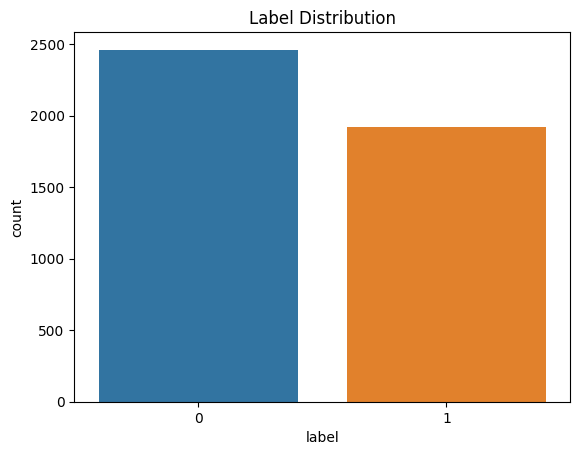

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title("Label Distribution")
plt.show()


In [15]:
X = df. drop('label' , axis=1)
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [16]:
y=df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [17]:
print("Dimension of dataset after dropping null values:", df.shape)

Dimension of dataset after dropping null values: (4380, 5)


In [18]:
messages=df.copy()
messages.reset_index(inplace=True)
messages.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [19]:
messages['text'][1]

'Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed “no debate so far as I could ascertain as to who their spokesman was to be” (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). “I am very glad that Miss Adams made it clear that what I am speaking for today is all of us —  the 400 of us,” Miss Rodham told her classmates. After appointing herself Edger Bergen to the Charlie McCarthys and Mor

In [20]:
import nltk

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

ps = PorterStemmer()
corpus = []

for i in range(0, len(messages)):
  review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
  review = review.lower()
  review = review.split()
    
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X_cv = cv.fit_transform(corpus).toarray()

In [24]:
df_cv = pd.concat([df,pd.DataFrame(X_cv)],axis = 1)
df_cv.head()

,id,title,author,text,label,0,1,2,3,4,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and labels (y)
X = df_cv.drop(['label'], axis=1)
y = df_cv['label']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  
(20800, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count 

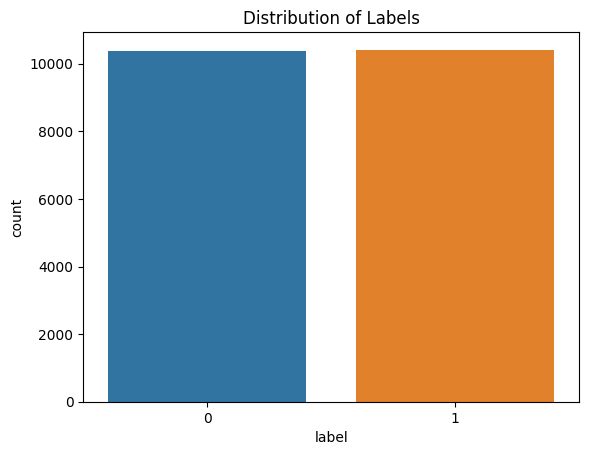

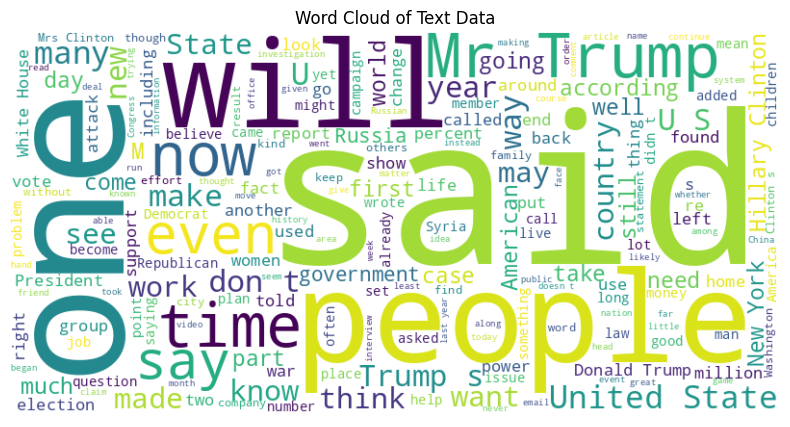

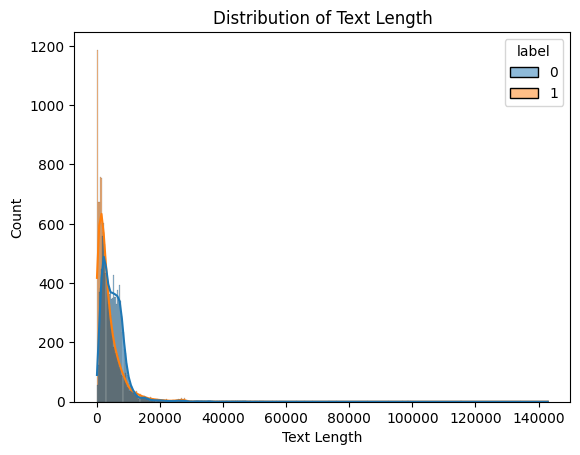

Accuracy: 0.961717254580257
Confusion Matrix:
[[2018   64]
 [  76 1499]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2082
           1       0.96      0.95      0.96      1575

    accuracy                           0.96      3657
   macro avg       0.96      0.96      0.96      3657
weighted avg       0.96      0.96      0.96      3657



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


def load_dataset(file_path):
    df = pd.read_csv(file_path)
    return df


def perform_eda(df):
    # Display the first few rows of the dataset
    print(df.head())

    # Check the dimensions of the dataset
    print(df.shape)

    # Check the information about the columns and their data types
    print(df.info())

    # Convert the 'text' column to string
    df['text'] = df['text'].astype(str)

    # Check the distribution of the target variable
    sns.countplot(x='label', data=df)
    plt.title('Distribution of Labels')
    plt.show()

    # Generate a word cloud visualization
    all_text = ' '.join(df['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Text Data')
    plt.show()

    # Generate a bar plot of text length
    df['text_length'] = df['text'].apply(len)
    sns.histplot(data=df, x='text_length', hue='label', kde=True)
    plt.title('Distribution of Text Length')
    plt.xlabel('Text Length')
    plt.ylabel('Count')
    plt.show()



def preprocess_data(df):
    df.dropna(inplace=True)
    df['processed_text'] = df['text'].apply(lambda x: re.sub(r'\W', ' ', x.lower()))
    df['processed_text'] = df['processed_text'].apply(lambda x: re.sub(r'\s+', ' ', x))
    X = df['processed_text']
    y = df['label']
    return X, y


def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    vectorizer = CountVectorizer()
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)
    model = LogisticRegression()
    model.fit(X_train_vectorized, y_train)
    y_pred = model.predict(X_test_vectorized)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    return accuracy, conf_matrix, classification_rep


def create_presentation():
    # Load the dataset
    df = load_dataset('/content/drive/MyDrive/Tech I.S/techis-ds-wiki-main/DS/Step 3-1 NLP/01_NLP/FakeNews.csv')

    # Perform EDA
    perform_eda(df)

    # Preprocess the data
    X, y = preprocess_data(df)

    # Train the model and evaluate performance
    accuracy, conf_matrix, classification_rep = train_model(X, y)

    # Print the evaluation metrics
    print('Accuracy:', accuracy)
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(classification_rep)


if __name__ == '__main__':
    create_presentation()
